In [1]:
import pandas as pd
import numpy as np
import datetime

# Read Data

In [2]:
#df=pd.read_csv('data/calls.csv',index_col='DATE',parse_dates=True)
#df=df.dropna()

In [3]:
df_envios = pd.read_pickle('data/df_Envios')
df_envios.head(1)

,total,Bag 14,Bag 19,Burofax,Devolución burofax,Documentos 14,E-Commerce,E-commerce,E-commerce canje,Ecobox 25,...,Urgente 8:30,Urgente 8:30 expedición,Urgente funchal,Urgente hoy,NaN,Friday,Monday,Thursday,Tuesday,Wednesday
Fecha envío,,,,,,,,,,,,,,,,,,,,,
2019-01-01,33,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0


In [4]:
df_envios.tail(1)

,total,Bag 14,Bag 19,Burofax,Devolución burofax,Documentos 14,E-Commerce,E-commerce,E-commerce canje,Ecobox 25,...,Urgente 8:30,Urgente 8:30 expedición,Urgente funchal,Urgente hoy,NaN,Friday,Monday,Thursday,Tuesday,Wednesday
Fecha envío,,,,,,,,,,,,,,,,,,,,,
2021-12-04,2991,0.0,0.0,6.0,0.0,0.0,0.0,790.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0


In [5]:
df_envios = df_envios[['total']]
df_envios.head()

,total
Fecha envío,
2019-01-01,33
2019-01-02,1923
2019-01-03,1408
2019-01-04,3220
2019-01-05,23


In [6]:
df_envios['t1'] = df_envios.shift(periods=1)
df_envios['t2'] = df_envios['total'].shift(periods=2)
df_envios['t3'] = df_envios['total'].shift(periods=3)
df_envios['t4'] = df_envios['total'].shift(periods=4)
df_envios['t5'] = df_envios['total'].shift(periods=5)
df_envios.head()

,total,t1,t2,t3,t4,t5
Fecha envío,,,,,,
2019-01-01,33,NaN,NaN,NaN,NaN,NaN
2019-01-02,1923,33.0,NaN,NaN,NaN,NaN
2019-01-03,1408,1923.0,33.0,NaN,NaN,NaN
2019-01-04,3220,1408.0,1923.0,33.0,NaN,NaN
2019-01-05,23,3220.0,1408.0,1923.0,33.0,NaN


In [7]:
#df_envios.dropna(inplace=True)
df_envios.head()

,total,t1,t2,t3,t4,t5
Fecha envío,,,,,,
2019-01-01,33,NaN,NaN,NaN,NaN,NaN
2019-01-02,1923,33.0,NaN,NaN,NaN,NaN
2019-01-03,1408,1923.0,33.0,NaN,NaN,NaN
2019-01-04,3220,1408.0,1923.0,33.0,NaN,NaN
2019-01-05,23,3220.0,1408.0,1923.0,33.0,NaN


In [8]:
list = ['t5','t4','t3','t2','t1','total']
df_envios = df_envios[list]
df_envios['t'] = df_envios['total']
df_envios.drop('total', axis='columns', inplace=True)
df_envios.index = df_envios.index.rename('Date')
df_envios.head()

,t5,t4,t3,t2,t1,t
Date,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,33
2019-01-02,NaN,NaN,NaN,NaN,33.0,1923
2019-01-03,NaN,NaN,NaN,33.0,1923.0,1408
2019-01-04,NaN,NaN,33.0,1923.0,1408.0,3220
2019-01-05,NaN,33.0,1923.0,1408.0,3220.0,23


In [9]:
df_calls = pd.read_pickle('data/df_Call')
print('Shape of data',df_calls.shape)
df_calls.head()

Shape of data (575, 1)


,dateCreacion
Date,
2019-01-02,281
2019-01-03,283
2019-01-04,351
2019-01-07,173
2019-01-08,174


In [10]:
df_calls.tail()

,dateCreacion
Date,
2021-04-15,116
2021-04-16,114
2021-04-19,114
2021-04-20,108
2021-04-21,53


In [11]:
df_calls.reset_index(inplace=True)
df_calls.head()

,Date,dateCreacion
0,2019-01-02,281
1,2019-01-03,283
2,2019-01-04,351
3,2019-01-07,173
4,2019-01-08,174


In [12]:
df_calls = df_calls.set_index('Date').join(df_envios, how='left')

In [13]:
df_calls.reset_index(inplace=True)
df_calls.head()

,Date,dateCreacion,t5,t4,t3,t2,t1,t
0,2019-01-02,281,NaN,NaN,NaN,NaN,33.0,1923.0
1,2019-01-03,283,NaN,NaN,NaN,33.0,1923.0,1408.0
2,2019-01-04,351,NaN,NaN,33.0,1923.0,1408.0,3220.0
3,2019-01-07,173,1923.0,1408.0,3220.0,23.0,248.0,4595.0
4,2019-01-08,174,1408.0,3220.0,23.0,248.0,4595.0,2924.0


In [14]:
begin_date = '2019-01-02'
end_date = '2021-04-20'

#df = pd.DataFrame({'date':pd.date_range(begin_date, periods=840)})
df = pd.DataFrame({'date':pd.date_range(begin_date,end_date)})

In [15]:
df['Date'] = [str(x.date()) for x in df['date']]

In [16]:
df = df.set_index('Date').join(df_calls.set_index('Date'))#[['dateCreacion']]
#df = df_calls

In [17]:
#df.fillna(0, inplace=True)

In [18]:
df.reset_index(inplace=True)

In [19]:
df = df.drop('date', axis='columns')
##########df = df.iloc[5:]
df.head(10)

,Date,dateCreacion,t5,t4,t3,t2,t1,t
0,2019-01-02,281.0,NaN,NaN,NaN,NaN,33.0,1923.0
1,2019-01-03,283.0,NaN,NaN,NaN,33.0,1923.0,1408.0
2,2019-01-04,351.0,NaN,NaN,33.0,1923.0,1408.0,3220.0
3,2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-01-07,173.0,1923.0,1408.0,3220.0,23.0,248.0,4595.0
6,2019-01-08,174.0,1408.0,3220.0,23.0,248.0,4595.0,2924.0
7,2019-01-09,227.0,3220.0,23.0,248.0,4595.0,2924.0,289.0
8,2019-01-10,236.0,23.0,248.0,4595.0,2924.0,289.0,2461.0
9,2019-01-11,270.0,248.0,4595.0,2924.0,289.0,2461.0,23.0


In [20]:
df.fillna(0, inplace=True)

In [21]:
list = ['Date','t5','t4','t3','t2','t1','t','dateCreacion']
df = df[list]
df.head(10)

,Date,t5,t4,t3,t2,t1,t,dateCreacion
0,2019-01-02,0.0,0.0,0.0,0.0,33.0,1923.0,281.0
1,2019-01-03,0.0,0.0,0.0,33.0,1923.0,1408.0,283.0
2,2019-01-04,0.0,0.0,33.0,1923.0,1408.0,3220.0,351.0
3,2019-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2019-01-07,1923.0,1408.0,3220.0,23.0,248.0,4595.0,173.0
6,2019-01-08,1408.0,3220.0,23.0,248.0,4595.0,2924.0,174.0
7,2019-01-09,3220.0,23.0,248.0,4595.0,2924.0,289.0,227.0
8,2019-01-10,23.0,248.0,4595.0,2924.0,289.0,2461.0,236.0
9,2019-01-11,248.0,4595.0,2924.0,289.0,2461.0,23.0,270.0


# Plot Your Data

<AxesSubplot:>

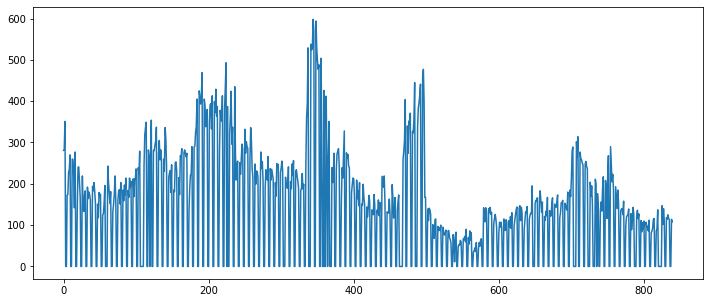

In [22]:
df['dateCreacion'].plot(figsize=(12,5))

# Check For Stationarity

In [23]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [24]:
adf_test(df['dateCreacion'])

1. ADF :  -2.8978518929950696
2. P-Value :  0.04559836392875905
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 819
5. Critical Values :
	 1% :  -3.4383596631852327
	 5% :  -2.865075444948184
	 10% :  -2.568652576059133


# Figure Out Order for ARIMA Model

In [25]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [26]:
stepwise_fit = auto_arima(df['dateCreacion'], trace=True,
                          suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10125.692, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10616.241, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10609.682, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10407.916, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10614.244, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10231.938, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10202.408, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10199.248, Time=0.85 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10149.512, Time=1.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10317.526, Time=0.54 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10182.808, Time=0.69 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10202.946, Time=0.62 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10096.640, Time=1.26 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.53 sec
 ARIMA(3,1,4)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  840
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -4806.304
Date:                Wed, 02 Jun 2021   AIC                           9634.609
Time:                        18:31:42   BIC                           9686.663
Sample:                             0   HQIC                          9654.560
                                - 840                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7806      0.066     11.917      0.000       0.652       0.909
ar.L2         -1.4266      0.050    -28.380      0.000      -1.525      -1.328
ar.L3          0.7783      0.092      8.447      0.000       0.598       0.959
ar.L4         -0.9766      0.051    -19.001      0.000      -1.077      -0.876
ar.L5         -0.0126      0.062     -0.204      0.838      -0.133       0.108
ma.L1         -1.5241      0.056    -27.141      0.000      -1.634      -1.414
ma.L2          1.8592      0.065     28.675      0.000       1.732       1.986
ma.L3         -1.7588      0.070    -25.101      0.000      -1.896      -1.621
ma.L4          1.4109      0.061     23.245      0.000       1.292       1.530
ma.L5         -0.6424      0.044    -14.443      0.000      -0.730      -0.555
sigma2      7879.9728    365.364     21.567      0.000    7163.872    8596.074
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):              1315.37
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
from statsmodels.tsa.arima_model import ARIMA

# Split Data into Training and Testing

In [28]:
print(df.shape)

(840, 8)


In [29]:
i, m = df.shape

to_train = int(i*0.8)
to_test = i - to_train

print(to_train+to_test)

840


In [30]:
train = df.iloc[:to_train]
test = df.iloc[-to_test:]
print(train.shape,test.shape)
print(test.iloc[0]), print(test.iloc[-1])

(672, 8) (168, 8)
Date            2020-11-04
t5                  1806.0
t4                   239.0
t3                   614.0
t2                  2321.0
t1                  2312.0
t                    802.0
dateCreacion         122.0
Name: 672, dtype: object
Date            2021-04-20
t5                  2111.0
t4                  1868.0
t3                   226.0
t2                    82.0
t1                  2835.0
t                   2147.0
dateCreacion         108.0
Name: 839, dtype: object


(None, None)

## Train the Model

In [31]:
from statsmodels.tsa.arima_model import ARIMA

In [46]:
model=ARIMA(train['dateCreacion'],order=(5,1,5), exog=train[['t5','t4','t3','t2','t1','t']])
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.dateCreacion   No. Observations:                  671
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -3889.349
Method:                       css-mle   S.D. of innovations             79.190
Date:                Wed, 02 Jun 2021   AIC                           7814.697
Time:                        18:38:57   BIC                           7895.855
Sample:                             1   HQIC                          7846.131
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -81.3776        nan        nan        nan         nan         nan
t5                       0.0053        nan        nan        nan         nan         nan
t4                       0.0094        nan        nan        nan         nan         nan
t3                       0.0046        nan        nan        nan         nan         nan
t2                       0.0155        nan        nan        nan         nan         nan
t1                       0.0010        nan        nan        nan         nan         nan
t                        0.0203        nan        nan        nan         nan         nan
ar.L1.D.dateCreacion     0.2883        nan        nan        nan         nan         nan
ar.L2.D.dateCreacion    -1.0091        nan        nan        nan         nan         nan
ar.L3.D.dateCreacion     0.0366        nan        nan        nan         nan         nan
ar.L4.D.dateCreacion    -0.5710        nan        nan        nan         nan         nan
ar.L5.D.dateCreacion    -0.5039        nan        nan        nan         nan         nan
ma.L1.D.dateCreacion    -0.6431        nan        nan        nan         nan         nan
ma.L2.D.dateCreacion     1.0526        nan        nan        nan         nan         nan
ma.L3.D.dateCreacion    -0.4011        nan        nan        nan         nan         nan
ma.L4.D.dateCreacion     0.6584        nan        nan        nan         nan         nan
ma.L5.D.dateCreacion     0.0746        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6237           -0.7830j            1.0010           -0.1429
AR.2            0.6237           +0.7830j            1.0010            0.1429
AR.3           -0.2250           -0.9876j            1.0129           -0.2856
AR.4           -0.2250           +0.9876j            1.0129            0.2856
AR.5           -1.9306           -0.0000j            1.9306           -0.5000
MA.1            0.6625           -0.8088j            1.0455           -0.1408
MA.2            0.6625           +0.8088j            1.0455            0.1408
MA.3           -0.2981           -1.0930j            1.1329           -0.2924
MA.4           -0.2981           +1.0930j            1.1329            0.2924
MA.5           -9.5546           -0.0000j            9.5546           -0.5000
-----------------------------------------------------------------------------
"""

# Make Predictions on Test Set

In [47]:
start = len(train)
end = len(train)+len(test)-1

pred = model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['dateCreacion'].plot(legend=True)

ValueError: You must provide exog for ARMAX

In [34]:
error = test
error['predicciones'] = pred
error.head()

,Date,t5,t4,t3,t2,t1,t,dateCreacion,predicciones
672,2020-11-04,1806.0,239.0,614.0,2321.0,2312.0,802.0,122.0,115.604868
673,2020-11-05,239.0,614.0,2321.0,2312.0,802.0,5505.0,151.0,146.980647
674,2020-11-06,614.0,2321.0,2312.0,802.0,5505.0,2217.0,166.0,133.469539
675,2020-11-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.890379
676,2020-11-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.524668


In [35]:
error['diff'] = error.dateCreacion - error.predicciones
error.head()

,Date,t5,t4,t3,t2,t1,t,dateCreacion,predicciones,diff
672,2020-11-04,1806.0,239.0,614.0,2321.0,2312.0,802.0,122.0,115.604868,6.395132
673,2020-11-05,239.0,614.0,2321.0,2312.0,802.0,5505.0,151.0,146.980647,4.019353
674,2020-11-06,614.0,2321.0,2312.0,802.0,5505.0,2217.0,166.0,133.469539,32.530461
675,2020-11-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.890379,-17.890379
676,2020-11-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.524668,1.524668


In [36]:
error['diff'] = error['diff'].abs()

In [37]:
error.head()

,Date,t5,t4,t3,t2,t1,t,dateCreacion,predicciones,diff
672,2020-11-04,1806.0,239.0,614.0,2321.0,2312.0,802.0,122.0,115.604868,6.395132
673,2020-11-05,239.0,614.0,2321.0,2312.0,802.0,5505.0,151.0,146.980647,4.019353
674,2020-11-06,614.0,2321.0,2312.0,802.0,5505.0,2217.0,166.0,133.469539,32.530461
675,2020-11-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.890379,17.890379
676,2020-11-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.524668,1.524668


In [38]:
error['diff'].describe()

count    168.000000
mean      43.643009
std       47.087903
min        0.197435
25%       10.276398
50%       20.782921
75%       55.083530
max      195.834501
Name: diff, dtype: float64

<AxesSubplot:>

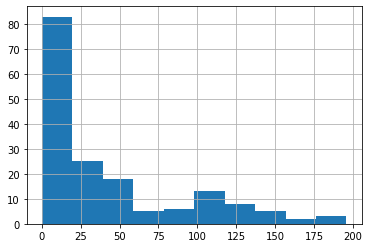

In [39]:
error['diff'].hist()

In [40]:
#pred.plot(legend='ARIMA Predictions')
#test['dateCreacion'].plot(legend=True)

In [41]:
test['dateCreacion'].mean()

105.70833333333333

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['dateCreacion']))
print(rmse)


64.09980328101551


In [43]:
model2=ARIMA(df['dateCreacion'],order=(5,1,5))
model2=model2.fit()

# For Future Dates

In [44]:
pred=model2.predict(start=len(df),end=len(df)+50,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
#pred.index=index_future_dates
print(pred)

840    105.836504
841    117.866342
842     91.314450
843     10.825867
844      9.948588
845     91.703976
846    120.276232
847    104.274667
848    116.052385
849     89.988387
850     10.954970
851     10.268830
852     90.726484
853    118.661747
854    102.728759
855    114.255706
856     88.671119
857     11.066578
858     10.564911
859     89.744738
860    117.055985
861    101.194039
862    112.475960
863     87.362439
864     11.160956
865     10.837270
866     88.758887
867    115.458848
868     99.670302
869    110.712808
870     86.062142
871     11.238364
872     11.086343
873     87.769078
874    113.870237
875     98.157348
876    108.965919
877     84.770031
878     11.299057
879     11.312553
880     86.775452
881    112.290054
882     96.654979
883    107.234965
884     83.485910
885     11.343290
886     11.516319
887     85.778148
888    110.718203
889     95.163001
890    105.519629
Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

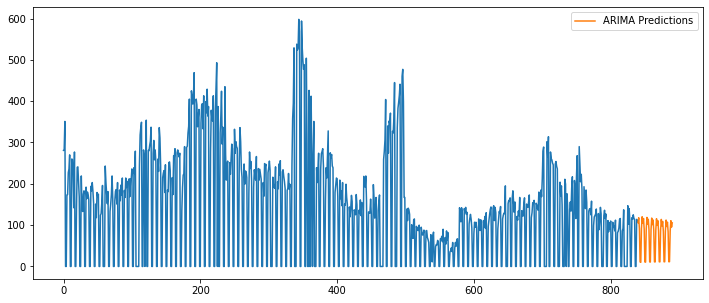

In [45]:
df['dateCreacion'].plot()
pred.plot(figsize=(12,5),legend=True)